This notebook focuses on prediction of sales value for test dataset on the basis of factors we analyzed during Pre-processing and data analysis

In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data
train = pd.read_csv("modified_train.csv")
test = pd.read_csv("modified_test.csv")
test_original = pd.read_csv("test.csv")

In [3]:
correlation = train[train.columns].corr()
correlation.to_csv("correlation.csv")

from correlation matrix we can see, Item_Mrp, Outlet_Years, Outlet_Identifier, Outlet_Location_type1, Outlet_Size_1, Outlet_Type_Supermarket Type1, Outlet_Type_Supermarket Type3
have the highest impact on outlet sales amount. But taking outlet_identifier as a factor is of no use so we will take the other factors into consideration and compute the sales price for test dataset.

In [4]:
train = train[['Item_MRP','Item_Visibility', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Item_Outlet_Sales']]
test = test[['Item_MRP','Item_Visibility', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Item_Outlet_Sales']]

In [5]:
#Dividing the dataset into dependent and independent factors for both test and train data
X_train = train[['Item_MRP','Item_Visibility', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2']]
y_train = train[['Item_Outlet_Sales']]
X_test = test[['Item_MRP','Item_Visibility', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2']]
y_test = test[['Item_Outlet_Sales']]

After the analysis performed and factors decided for the model, we will further pre-process the data by standardizing it. I consider standardizing should be done in order to have scaled data in the set such that the results we have are not affected. 

I have used linear regression model though, using the model is not suitable here but I would like to note a difference of values predicted by linear model compared to decision tree and random forest

In [6]:
#Standard scalar class used to standardize the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.fit_transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
regressor_linearmodel = LinearRegression()
regressor_linearmodel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_predict_linearmodel = regressor_linearmodel.predict(X_test)

#### Why Decision Tree regression ?

Decision tree divides the data in such a way that it adds information by making leaf or node. The value of a new data point is an average of values in that leaf.

Here, we have various variables on which the value of sale is dependent and hence each leaf node formed would give us an average value which will be used in predicting the sales value.

In [9]:
from sklearn.tree import DecisionTreeRegressor
regressor_decisiontree = DecisionTreeRegressor(random_state=0)
regressor_decisiontree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [10]:
y_predict_decisiontree= regressor_decisiontree.predict(X_test)

#### Why Random Forest?

Random forest uses ensemble method and thus makes a much more powerful predictive model. It uses decision tree several times thus eventually improving the accuracy of the model.

Ensemble methods are more powerful because of the fact that a small change in a dataset can affect one tree but its very difficult to affect an entire forest of trees, thus adding a benefit over Decision tree algorithm

In [11]:
from sklearn.ensemble import RandomForestRegressor
regressor_randomforest = RandomForestRegressor(n_estimators=300, random_state=0)
regressor_randomforest.fit(X_train, y_train)

C:\Users\jagdip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
y_predict_randomforest= regressor_randomforest.predict(X_test)

In [13]:
y_predict_randomforest_score = regressor_randomforest.score(X_test, y_predict_randomforest)
y_predict_randomforest_score_train = regressor_randomforest.score(X_train, y_train)
y_predict_decisiontree_score = regressor_decisiontree.score(X_test, y_predict_decisiontree)
y_predict_decisiontree_score_train = regressor_decisiontree.score(X_train, y_train)
y_predict_linear_score = regressor_linearmodel.score(X_test, y_predict_randomforest)
y_predict_linear_score_train = regressor_linearmodel.score(X_train, y_train)

In [14]:
#The accuracy of each algorithm:
print (y_predict_randomforest_score)
print (y_predict_randomforest_score_train)
print (y_predict_decisiontree_score)
print (y_predict_decisiontree_score_train)
print (y_predict_linear_score)
print (y_predict_linear_score_train)

1.0
0.938701973031
1.0
0.999999999676
-1.72373323437e+22
0.562583717908


We can observe that the accuracy of random forest and decision tree algorithm has been higher and the linear model is not sufficient here to predict the values. Using a linear model for such dataset would definitely not give us the right approximated predicted value. 

In [15]:
y_predict_linearmodel = sc_y.inverse_transform(y_predict_linearmodel)
y_predict_randomforest = sc_y.inverse_transform(y_predict_randomforest)
y_predict_decisiontree = sc_y.inverse_transform(y_predict_decisiontree)

In [16]:
#inverse the standardisation to get the actual values 
X_test = sc_X.inverse_transform(X_test)

In [17]:
prediction_linear = pd.DataFrame(y_predict_linearmodel, columns=['Outlet_Sales_Linear'])
prediction_decisiontree = pd.DataFrame(y_predict_decisiontree, columns=['Outlet_Sales_dt'])
prediction_randomforest = pd.DataFrame(y_predict_randomforest, columns=['Outlet_Sales_rf'])
#X_test = pd.DataFrame(X_test)
#Prediction.tofile('predictions.csv', sep=',')

In [18]:
prediction = pd.concat([test_original, prediction_decisiontree, prediction_randomforest, prediction_linear], axis=1)
prediction.to_csv("prediction.csv" )
#prediction.columns['prediction_linear', 'prediction_decisiontree', 'prediction_randomforest']

In [19]:
prediction = pd.read_csv('prediction.csv')

In [20]:
Sales_distribution = prediction

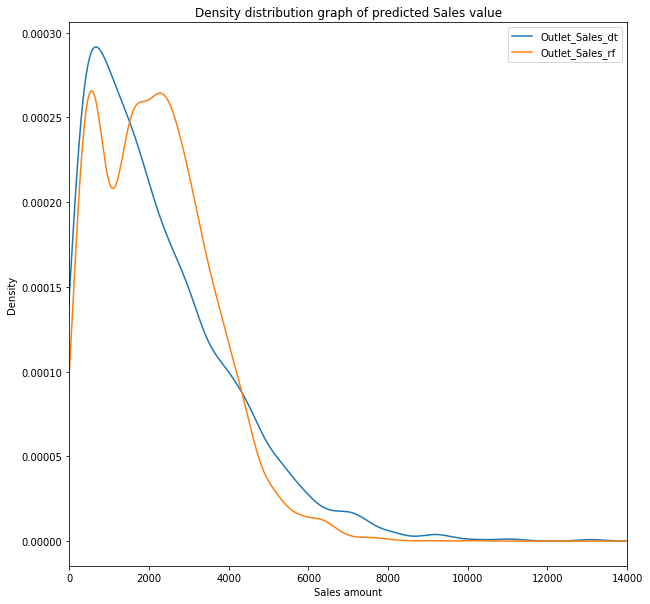

Mean of Sales decision tree:
2236.890717244619
Standard deviation of Sales decision tree:
1799.7718752699204
Mean of Sales random forest:
2198.0285379294282
Standard deviation of Sales random forest:
1396.3659187531455


In [22]:
combined_data = pd.DataFrame(Sales_distribution[['Outlet_Sales_dt','Outlet_Sales_rf']])
combined_data.plot(kind="density",
              figsize=(10,10),
              xlim=(0,14000), title='Density distribution graph of predicted Sales value')
plt.xlabel('Sales amount')
plt.ylabel('Density')
plt.show()

print ('Mean of Sales decision tree:')
print (combined_data['Outlet_Sales_dt'].mean())
print ('Standard deviation of Sales decision tree:')
print (combined_data['Outlet_Sales_dt'].std())

print ('Mean of Sales random forest:')
print (combined_data['Outlet_Sales_rf'].mean())
print ('Standard deviation of Sales random forest:')
print (combined_data['Outlet_Sales_rf'].std())


We had a similarly right skewed distribution of sale for training data with mean of 2181 and standard deviation of 1780

### Future work:

Here we have not considered the Item_identifier in the predictive model data but the item definitely has a more impact rather than the category of item. 
We can work with each item and predict the values but would more powerful algorithm to deal with 1559 products in addition to the product and outlet features influencing the sale.